## License Status Prediction  - Multiclass Classification - Imbalanced Dataset - EDA - Part 2 - Modelling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [23]:
# Loading the dataframe
df=pd.read_csv('sampled_df.csv')

In [24]:
df.head()

,latitude,longitude,license_status_change,target,completion_to_start,start_to_expiry,approval_to_issuance,completion_to_payment,presence_of_enquiry_details,license_description_tar_enc,state_tar_enc,city_tar_enc,conditional_approval_Y,application_type_C_EXPA,application_type_C_LOC,application_type_ISSUE,application_type_RENEW
0,41.978665,-87.699738,0,0,63.0,730.0,0.0,42.0,0,0.119616,0.64244,0.320896,0,0,0,0,1
1,42.003605,-87.664156,0,0,50.0,364.0,1.0,28.0,0,0.450820,0.64244,0.320896,0,0,0,0,1
2,41.880571,-87.680934,0,0,63.0,729.0,1.0,61.0,0,0.765823,0.64244,0.892925,0,0,0,0,1
3,41.890130,-87.699736,0,0,62.0,729.0,3.0,32.0,0,0.757458,0.64244,0.320896,0,0,0,0,1
4,41.867569,-87.685916,0,0,93.0,395.0,1.0,0.0,0,0.158552,0.64244,0.320896,0,0,0,1,0


In [25]:
X=df.drop('target', axis=1)
y=df.target

In [26]:
# Train/test preparation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [86]:
#storage of F1 score of all the values for comparison
model_perform=dict()

In [88]:
from sklearn import metrics

### Model -1 - kNeighbor Classfier

In [87]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [89]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
knn_model.fit((scaler.transform(X_train)),y_train)
scaler.fit(X_test)
y_pred = knn_model.predict(scaler.transform(X_test))

In [90]:
f_score=metrics.f1_score(y_test,y_pred,average="macro")

In [91]:
model_perform['knn']=f_score

In [28]:
# Metrics Performance
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       910
           1       1.00      1.00      1.00      1648
           2       0.00      0.00      0.00        51
           3       0.86      0.58      0.69        33
           4       0.41      0.50      0.45        54

    accuracy                           0.96      2696
   macro avg       0.64      0.61      0.62      2696
weighted avg       0.94      0.96      0.95      2696



### Model -2 - Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [30]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.39      0.44       910
           1       0.69      0.82      0.75      1648
           2       0.00      0.00      0.00        51
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        54

    accuracy                           0.64      2696
   macro avg       0.24      0.24      0.24      2696
weighted avg       0.59      0.64      0.61      2696



In [93]:
f_score=metrics.f1_score(y_test,y_pred,average="macro")
model_perform['logreg']=f_score

### Model -3 - Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
y_pred = nb_model.fit(X_train, y_train).predict(X_test)

In [32]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.22      0.36       910
           1       1.00      1.00      1.00      1648
           2       1.00      1.00      1.00        51
           3       0.27      1.00      0.43        33
           4       0.06      0.76      0.11        54

    accuracy                           0.73      2696
   macro avg       0.66      0.80      0.58      2696
weighted avg       0.97      0.73      0.76      2696



In [96]:
f_score=metrics.f1_score(y_test,y_pred,average="macro")
model_perform['nb']=f_score

### Model -4 - Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=0)
y_pred = dt_model.fit(X_train, y_train).predict(X_test)

In [34]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       910
           1       1.00      1.00      1.00      1648
           2       0.96      1.00      0.98        51
           3       1.00      1.00      1.00        33
           4       0.76      0.89      0.82        54

    accuracy                           0.99      2696
   macro avg       0.94      0.97      0.96      2696
weighted avg       0.99      0.99      0.99      2696



In [98]:
f_score=metrics.f1_score(y_test,y_pred,average="macro")
model_perform['dt']=f_score

In [16]:
print(confusion_matrix(y_test,y_pred))

[[ 885    0    1    0   23]
 [   0 1658    0    0    0]
 [   0    0   30    0    0]
 [   0    0    0   41    0]
 [   6    0    0    0   52]]


In [35]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, dt_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

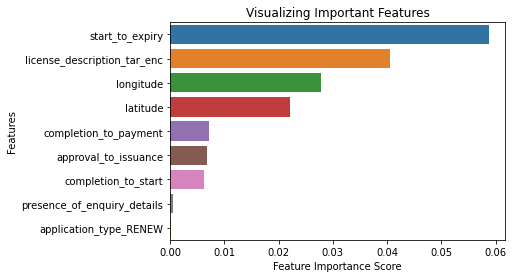

In [36]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model -5 - Random Forest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=1)
y_pred = rf_model.fit(X_train, y_train).predict(X_test)

In [38]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       1.00      1.00      1.00      1648
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        33
           4       0.92      0.89      0.91        54

    accuracy                           1.00      2696
   macro avg       0.98      0.98      0.98      2696
weighted avg       1.00      1.00      1.00      2696



In [100]:
f_score=metrics.f1_score(y_test,y_pred,average="macro")
model_perform['rf']=f_score

In [39]:
print(confusion_matrix(y_test,y_pred))

[[ 906    0    0    0    4]
 [   0 1648    0    0    0]
 [   0    0   51    0    0]
 [   0    0    0   33    0]
 [   6    0    0    0   48]]


In [40]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, rf_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

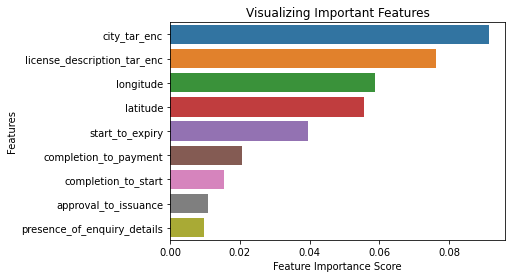

In [41]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Model -6 - Adaboost Classifier

In [101]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=0)
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=0)

In [102]:
y_pred = ada_model.predict(X_test)

In [44]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       910
           1       1.00      1.00      1.00      1648
           2       0.81      1.00      0.89        51
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        54

    accuracy                           0.96      2696
   macro avg       0.54      0.60      0.57      2696
weighted avg       0.93      0.96      0.95      2696



In [103]:
f_score=metrics.f1_score(y_test,y_pred,average="macro")
model_perform['adboost']=f_score

### Model -7 - XGboost Classifier

In [104]:
from xgboost import XGBClassifier
xg_model = XGBClassifier(random_state=1)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=1, reg_alpha=0, ...)

In [105]:
y_pred = xg_model.predict(X_test)

In [47]:
# Metrics Performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       910
           1       1.00      1.00      1.00      1648
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        33
           4       0.94      0.89      0.91        54

    accuracy                           1.00      2696
   macro avg       0.99      0.98      0.98      2696
weighted avg       1.00      1.00      1.00      2696



In [106]:
f_score=metrics.f1_score(y_test,y_pred,average="macro")
model_perform['xgboost']=f_score

In [48]:
print(confusion_matrix(y_test,y_pred))

[[ 907    0    0    0    3]
 [   0 1648    0    0    0]
 [   0    0   51    0    0]
 [   0    0    0   33    0]
 [   6    0    0    0   48]]


In [49]:
# Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns, rf_model.feature_importances_])
feature_importance = feature_importance.T.sort_values(by = 1, ascending=False)[1:10]

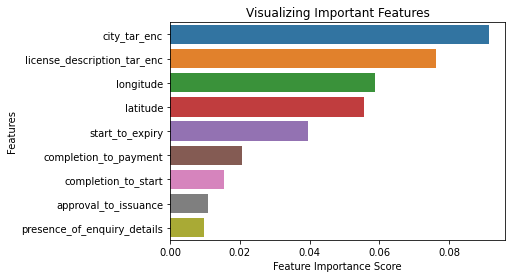

In [50]:
import seaborn as sns
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
### Hyperparameter Tuning

In [ ]:
# Hyperparameter Tuning - Tree parameters
1. No. of trees
2. Depth of the trees
3. Min no. of samples in the leaf node
4. Max number of features
5. Split Criterion 

In [51]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [52]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,15,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,10]

In [53]:
max_depth # None for infinite tree -giving tree one more option

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

In [54]:
# Creation the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'min_samples_leaf':[1]
               }
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1]}


### Randomized Search CV

In [55]:
rf_random = RandomizedSearchCV(estimator = rf_model, 
                               param_distributions = random_grid, n_iter = 10, cv = 3, 
                               verbose=2, random_state=42, n_jobs = -1)

In [56]:
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [57]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90}

In [59]:
rf_model_tuned = RandomForestClassifier(**rf_random.best_params_)

In [60]:
rf_model_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=90, max_features='sqrt', min_samples_split=5,
                       n_estimators=200)

In [107]:
y_pred = rf_model_tuned.predict(X_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       1.00      1.00      1.00      1648
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        33
           4       0.91      0.80      0.85        54

    accuracy                           0.99      2696
   macro avg       0.98      0.96      0.97      2696
weighted avg       0.99      0.99      0.99      2696



In [108]:
f_score=metrics.f1_score(y_test,y_pred,average="macro")
model_perform['rnd_src_rf']=f_score

In [63]:
print(confusion_matrix(y_test,y_pred))

[[ 906    0    0    0    4]
 [   0 1648    0    0    0]
 [   0    0   51    0    0]
 [   0    0    0   33    0]
 [  11    0    0    0   43]]


### Grid Search CV

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [50,100,150,None],
    'min_samples_leaf': [1,3, 4, 5],
    'min_samples_split': [2,4,5,6],
    'n_estimators': [50,100,150,200]
}

In [66]:
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [67]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150, None],
                         'min_samples_leaf': [1, 3, 4, 5],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=2)

In [68]:
grid_search.best_params_

{'max_depth': 50,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [69]:
rf_grid_tuned = RandomForestClassifier(**grid_search.best_params_)

In [70]:
rf_grid_tuned.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, n_estimators=50)

In [109]:
y_pred = rf_grid_tuned.predict(X_test)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       910
           1       1.00      1.00      1.00      1648
           2       1.00      1.00      1.00        51
           3       1.00      1.00      1.00        33
           4       0.92      0.89      0.91        54

    accuracy                           1.00      2696
   macro avg       0.98      0.98      0.98      2696
weighted avg       1.00      1.00      1.00      2696



In [110]:
f_score=metrics.f1_score(y_test,y_pred,average="macro")
model_perform['grd_src_rf']=f_score

In [73]:
print(confusion_matrix(y_test,y_pred))

[[ 906    0    0    0    4]
 [   0 1648    0    0    0]
 [   0    0   51    0    0]
 [   0    0    0   33    0]
 [   6    0    0    0   48]]


### Hyper parameter Tuning - Using Hyper Opt

In [74]:
from hyperopt import hp,fmin,tpe,Trials

In [78]:
from sklearn import metrics

In [75]:
# Create the parameter grid based on the results of random search 
param_grid_space ={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180
    }

In [76]:
def optimize(param_grid_space):
    X_train,y_train,X_test,y_test
    xgbm = XGBClassifier(n_estimators =param_grid_space['n_estimators'], max_depth = int(param_grid_space['max_depth']),
                         gamma = param_grid_space['gamma']
                        )
    xgbm.fit(X_train, y_train)
    y_pred = xgbm.predict(X_test)
    f1score = metrics.f1_score(y_test,y_pred,average="macro")
    return -1*f1score

In [79]:
trial = Trials()
result = fmin(fn=optimize,space=param_grid_space,max_evals=3,trials=trial,algo=tpe.suggest)


100%|██████████████████████████████████████████████████| 3/3 [00:37<00:00, 12.35s/trial, best loss: -0.952183680760708]


In [80]:
print(result)

{'colsample_bytree': 0.8449827516806221, 'gamma': 2.8811000110660636, 'max_depth': 9.0, 'min_child_weight': 4.0, 'reg_alpha': 72.0, 'reg_lambda': 0.06549880682652243}


In [81]:
result["max_depth"] = int(result["max_depth"])

In [82]:
print(result)

{'colsample_bytree': 0.8449827516806221, 'gamma': 2.8811000110660636, 'max_depth': 9, 'min_child_weight': 4.0, 'reg_alpha': 72.0, 'reg_lambda': 0.06549880682652243}


In [83]:
xg_model = XGBClassifier(**result)
xg_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.8449827516806221, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=2.8811000110660636, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=4.0,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=72.0, ...)

In [111]:
y_pred = xg_model.predict(X_test)

In [85]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       910
           1       1.00      1.00      1.00      1648
           2       1.00      1.00      1.00        51
           3       1.00      0.58      0.73        33
           4       0.83      0.37      0.51        54

    accuracy                           0.98      2696
   macro avg       0.96      0.79      0.84      2696
weighted avg       0.98      0.98      0.98      2696



In [112]:
f_score=metrics.f1_score(y_test,y_pred,average="macro")
model_perform['hypopt_xgb']=f_score

## Model Comparison

In [138]:
df=pd.DataFrame(model_perform,index=[1]).T.reset_index()
df

,index,1
0,knn,0.617059
1,logreg,0.238366
2,nb,0.579531
3,dt,0.957714
4,rf,0.980034
5,adboost,0.568499
6,xgboost,0.981870
7,rnd_src_rf,0.968655
8,grd_src_rf,0.980034
9,hypopt_xgb,0.981870


In [141]:
df.columns=['index',"F1_Score_macro"]


,index,F1_Score_macro
0,knn,0.617059
1,logreg,0.238366
2,nb,0.579531
3,dt,0.957714
4,rf,0.980034
5,adboost,0.568499
6,xgboost,0.981870
7,rnd_src_rf,0.968655
8,grd_src_rf,0.980034
9,hypopt_xgb,0.981870


In [142]:
df.set_index("index")

,F1_Score_macro
index,
knn,0.617059
logreg,0.238366
nb,0.579531
dt,0.957714
rf,0.980034
adboost,0.568499
xgboost,0.981870
rnd_src_rf,0.968655
grd_src_rf,0.980034


In [143]:
df.sort_values(by='F1_Score_macro', ascending=False,inplace=True)

In [150]:
df.set_index("index",inplace=True)
df

,F1_Score_macro
index,
xgboost,0.981870
hypopt_xgb,0.981870
rf,0.980034
grd_src_rf,0.980034
rnd_src_rf,0.968655
dt,0.957714
knn,0.617059
nb,0.579531
adboost,0.568499


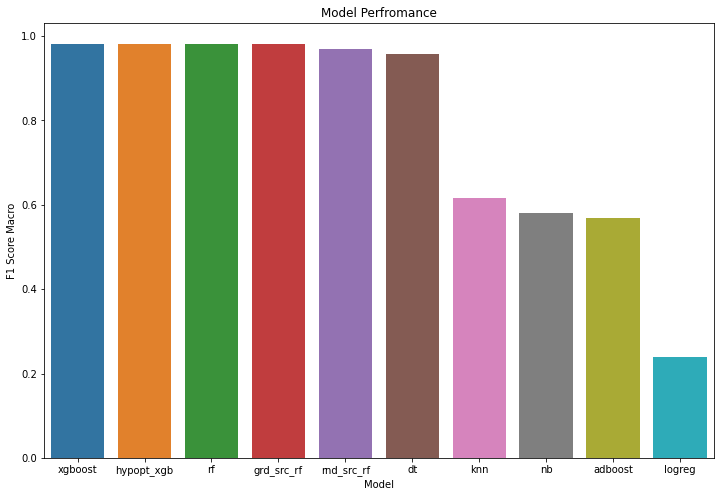

In [156]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.barplot(df.index,df.F1_Score_macro,data=df)
plt.xlabel("Model")
plt.ylabel("F1 Score Macro")
plt.title("Model Perfromance")
plt.show()

**Thoughts**

XG boost and XGboost optimized thru hyperopt peformed best with F1 Score 98.18% which is 75% improvment in the logistic regression model performance.